# Explore different parameters for ToMaTo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.visualization.visualize import get_scatterplot
from src.models.tomato import fit_tomato_model
from src.data.helper import get_coordinates_from_file

## dihedral.xyz

Change the value of maximum_threshold which is the prominence threshold

In [52]:
prominence_values = [10] + list(range(8, 0, -1)) + np.round(np.arange(0.5, 0.39, -0.025), 3).tolist() + np.round(
    np.arange(0.35, -0.05, -0.05), 2).tolist()
print(prominence_values)

[10, 8, 7, 6, 5, 4, 3, 2, 1, 0.5, 0.475, 0.45, 0.425, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]


In [4]:
file_path = "../data/raw/dihedral.xyz"
embeddings = get_coordinates_from_file(file_path)
clusters_ldtm = []
thresholds_ldtm = []
labels_ldtm = []

print('prominence values:', end=' ')
for merge_threshold in prominence_values:
    print(merge_threshold, end=' ')
    t = fit_tomato_model(embeddings, k=100, merge_threshold=merge_threshold)
    n_clusters = t.n_clusters_
    clusters_ldtm.append(n_clusters)
    thresholds_ldtm.append(merge_threshold)
    labels_ldtm.append(t.labels_)

prominence values: 10 8 7 6 5 4 3 2 1 0.5 0.475 0.45 0.425 0.4 0.35 0.3 0.25 0.2 0.15 0.1 0.05 0.0 

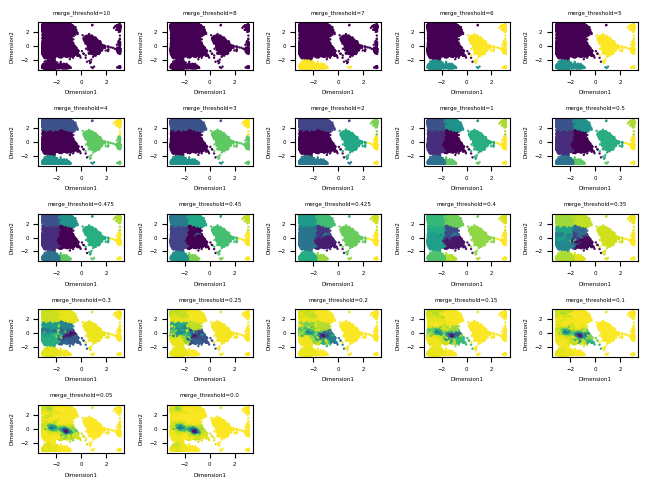

In [5]:
plt.rc('font', size=4)
plt.rc('axes', titlesize=4)
plt.rc('axes', labelsize=4)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)

i = 1
for merge_threshold, label_list in zip(thresholds_ldtm, labels_ldtm):
    plt.subplot(5, 5, i)
    get_scatterplot(embeddings, title=f'merge_threshold={merge_threshold}', c=label_list)
    i += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.rcParams['figure.dpi'] = 1000
plt.show()
plt.rcParams.update(plt.rcParamsDefault);

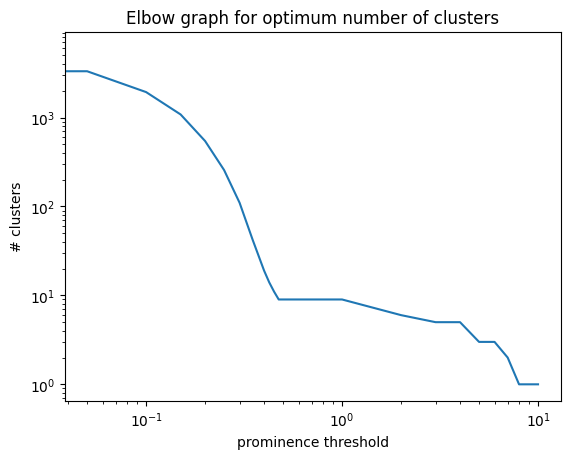

In [6]:
plt.plot(thresholds_ldtm, clusters_ldtm)
plt.xscale('log')
plt.yscale('log')
plt.title('Elbow graph for optimum number of clusters')
plt.xlabel("prominence threshold")
plt.ylabel("# clusters")
plt.show()

In [83]:
df = pd.DataFrame(np.array([clusters_ldtm, thresholds_ldtm]).T,
                  columns=['# clusters', 'prominence threshold']).set_index('prominence threshold')
df

,# clusters
prominence threshold,
10.000,1.0
8.000,1.0
7.000,2.0
6.000,3.0
5.000,3.0
4.000,5.0
3.000,5.0
2.000,6.0
1.000,9.0


From the elbow graph and the table above, we can see that cluster conformations with 6 and 9 clusters are the optimal ones.

Let's draw the plots for these conformations:

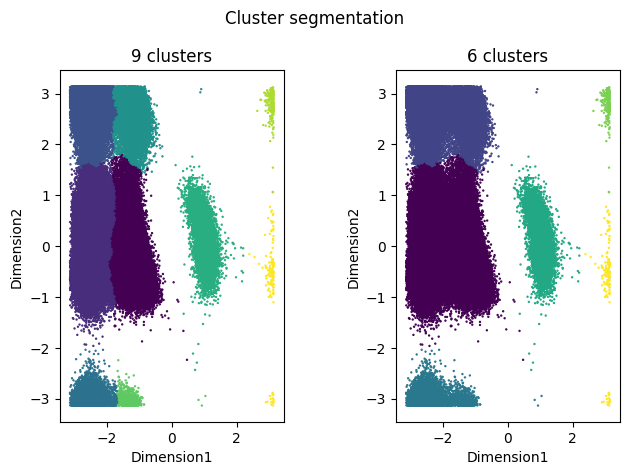

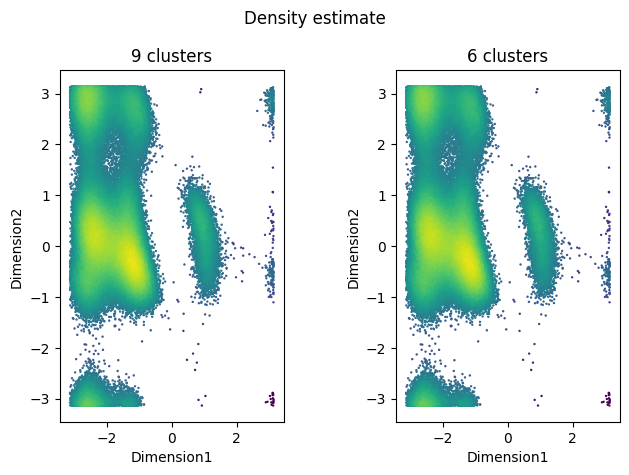

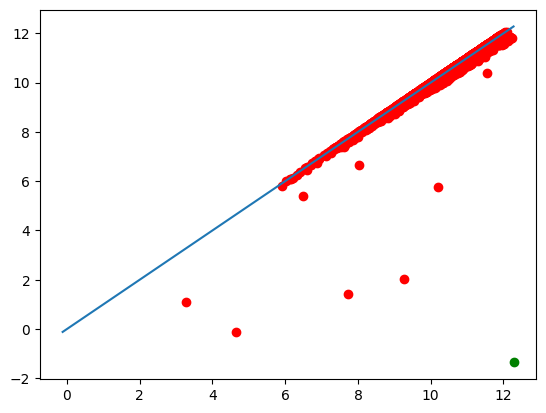

In [13]:
cluster_conformations = [9, 6]
t_clusters =[]
for i, n_clusters in enumerate(cluster_conformations):
    t = fit_tomato_model(embeddings, k=100, n_clusters=n_clusters)
    t_clusters.append(t)
for i, n_clusters in enumerate(cluster_conformations):
    plt.subplot(1, 2, i+1)
    get_scatterplot(embeddings, title=f'{n_clusters} clusters', c=t_clusters[i].labels_)
plt.suptitle("Cluster segmentation")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()
for i, n_clusters in enumerate(cluster_conformations):
    plt.subplot(1, 2, i+1)
    get_scatterplot(embeddings, title=f'{n_clusters} clusters', c=t_clusters[i].weights_)
plt.suptitle("Density estimate")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

t_clusters[1].plot_diagram()



## embeddings_20000prots.npy

In this section we will do the same analysis as before, but with the subsample of data that we used in our implementation:

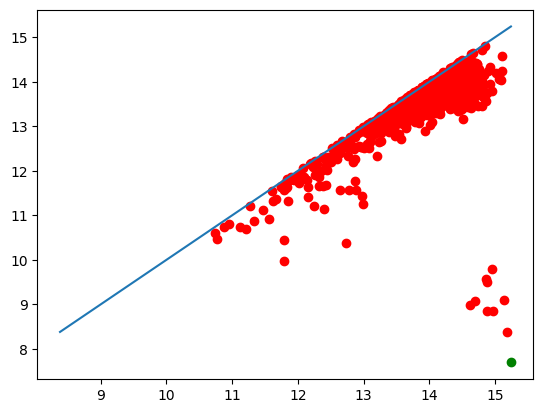

In [21]:
file_path2 = "../data/processed/embeddings_20000prots.npy"
embeddings2 = get_coordinates_from_file(file_path2)
t = fit_tomato_model(embeddings2)
t.plot_diagram()

In [75]:
prominence_values2 = [10,6]\
                     +np.round(np.arange(5,3.9,-0.2),2).tolist()\
                     +[3]\
                     +np.round(np.arange(2,0.9,-0.5),2).tolist()\
                     +np.round(np.arange(0.9,-0.1,-0.1),2).tolist()\
                     +[0]

print(prominence_values2)

[10, 6, 5.0, 4.8, 4.6, 4.4, 4.2, 4.0, 3, 2.0, 1.5, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, 0]


In [76]:
clusters_ldtm2 = []
thresholds_ldtm2 = []
labels_ldtm2 = []


print('prominence values:', end=' ')
for merge_threshold in prominence_values2:
    print(merge_threshold, end=' ')
    t = fit_tomato_model(embeddings2, k=20, merge_threshold=merge_threshold)
    n_clusters = t.n_clusters_
    clusters_ldtm2.append(n_clusters)
    thresholds_ldtm2.append(merge_threshold)
    labels_ldtm2.append(t.labels_)

prominence values: 10 6 5.0 4.8 4.6 4.4 4.2 4.0 3 2.0 1.5 1.0 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0 

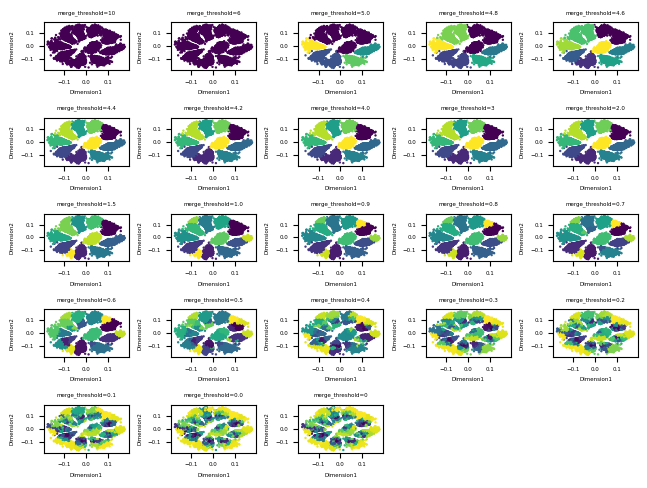

In [77]:
plt.rc('font', size=4)
plt.rc('axes', titlesize=4)
plt.rc('axes', labelsize=4)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)

i = 1
for merge_threshold, label_list in zip(thresholds_ldtm2, labels_ldtm2):
    plt.subplot(5, 5, i)
    get_scatterplot(embeddings2, title=f'merge_threshold={merge_threshold}', c=label_list)
    i += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.rcParams['figure.dpi'] = 1000
plt.show()
plt.rcParams.update(plt.rcParamsDefault);

In [84]:
df = pd.DataFrame(np.array([clusters_ldtm2, thresholds_ldtm2]).T,
                  columns=['# clusters', 'prominence threshold']).set_index('prominence threshold')
df

,# clusters
prominence threshold,
10.0,1.0
6.0,1.0
5.0,5.0
4.8,6.0
4.6,8.0
4.4,10.0
4.2,10.0
4.0,10.0
3.0,10.0


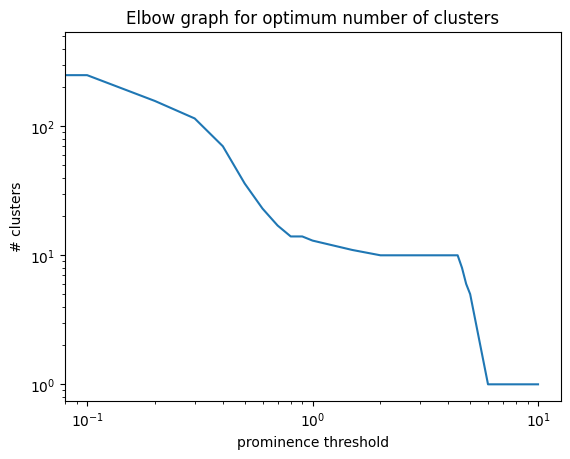

In [78]:
plt.plot(thresholds_ldtm2, clusters_ldtm2)
plt.xscale('log')
plt.yscale('log')
plt.title('Elbow graph for optimum number of clusters')
plt.xlabel("prominence threshold")
plt.ylabel("# clusters")
plt.show()

We can tell from the persistence graph, the elbow graph, and the overall conformation of the data, that the optimum number of clusters is 10

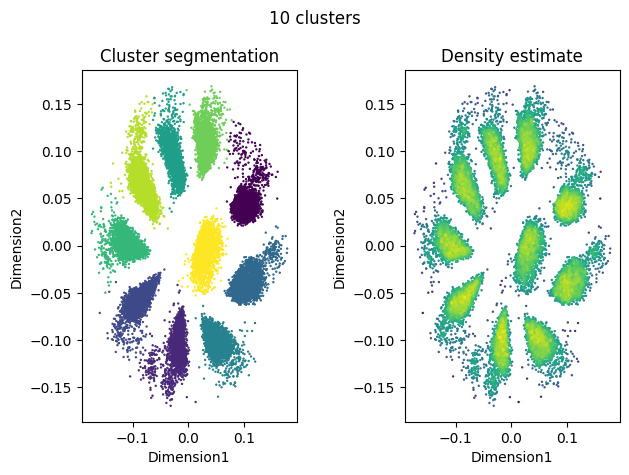

In [82]:
n_clusters=10
t = fit_tomato_model(embeddings2, k=20, n_clusters=n_clusters)
plt.subplot(1, 2, 1)
get_scatterplot(embeddings2, title="Cluster segmentation", c=t.labels_)
plt.subplot(1, 2, 2)
get_scatterplot(embeddings2, title="Density estimate", c=t.weights_)
plt.suptitle(f'{n_clusters} clusters')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()